In [1]:
import json
import csv

# Read JSON data from a file
json_filename ="/content/conversation.json"  # Replace with your actual JSON file name
with open(json_filename, "r") as json_file:
    json_data = json.load(json_file)

# Extract relevant data
csv_data = []
for source in json_data["Sources"]:
    id_value = source["ID"]
    url_value = source["URL"]

    # Accessing conversations under "ChatgptSharing"
    chatgpt_sharing = source.get("ChatgptSharing", [])

    # Initialize total word count and prompt for all conversations
    total_word_count = 0
    all_prompts = []

    # Loop through each conversation and accumulate word count and prompts
    for conversation in chatgpt_sharing:
        conversations_list = conversation.get("Conversations", [])
        for conv in conversations_list:
            answer_text = conv.get("Answer", "")
            word_count = len(answer_text.split())

            # Accumulate word count for each conversation
            total_word_count += word_count

            # Get the prompt for each conversation
            prompt = conv.get("Prompt", "")
            all_prompts.append(prompt)

    # Join all prompts into a single string with a separator
    prompts_str = "|".join(all_prompts)

    # Append the total word count and prompts to CSV data
    csv_data.append({"ID": id_value, "URL": url_value, "WordCount": total_word_count, "Prompt": prompts_str})

# Write to CSV file
csv_filename = "output.csv"
csv_columns = ["ID", "URL", "Prompt", "WordCount"]

with open(csv_filename, "w", newline="", encoding="utf-8") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
    writer.writeheader()
    for data in csv_data:
        writer.writerow(data)

print(f"CSV file '{csv_filename}' has been created.")


CSV file 'output.csv' has been created.


         ID                                            URL  \
0  36862850  https://news.ycombinator.com/item?id=36862850   
1  36852545  https://news.ycombinator.com/item?id=36852545   
2  36855516  https://news.ycombinator.com/item?id=36855516   
3  36821808  https://news.ycombinator.com/item?id=36821808   
4  36828409  https://news.ycombinator.com/item?id=36828409   

                                              Prompt  WordCount  
0  Write a training plan for a series of lessons ...        431  
1  nine hundred alda in meters.    If you don't h...       2027  
2  what a single-issue 5 stage pipeline on a CPU ...        345  
3  I'm going to define a style of English writing...        171  
4  In JS, create a Promise that is resolved with ...        281  
Expected Word Count for New Prompt: 47.766845202404895


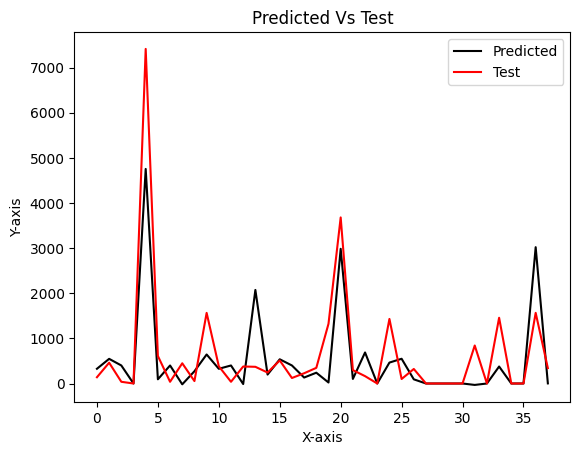

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/output.csv')  # Replace with your actual file path

# Explore data
print(df.head())

# Handle missing values in the 'prompt' column by filling NaN with an empty string
df['Prompt'].fillna('', inplace=True)

# Preprocess the data
vectorizer = CountVectorizer()
XP = vectorizer.fit_transform(df['Prompt'])
YP = df['WordCount']

X,y=XP[:100],YP[:100]
xtest,ytest=XP[100:],YP[100:]
# Train the model
model = LinearRegression()
model.fit(X, y)

# Example usage with a new prompt
new_prompt = ["World with single gender "]
new_prompt_vectorized = vectorizer.transform(new_prompt)
predicted_word_count = model.predict(new_prompt_vectorized)

print(f"Expected Word Count for New Prompt: {predicted_word_count[0]}")

# Plot actual vs predicted word count for the test set
ypred = []
for x in xtest:
  ypred.append(model.predict(x)[0])

ytest = list(ytest)
import matplotlib.pyplot as plt

# Plotting the black line
plt.plot(ypred, color='black', label='Predicted')

# Plotting the red line
plt.plot(ytest, color='red', label='Test')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Predicted Vs Test')

# Adding a legend
plt.legend()

# Display the plot
plt.show()